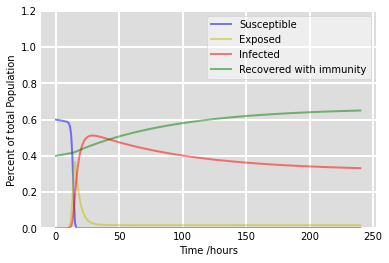

In [92]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 10000000000
newHosts, initialProt = 5500000/24, 0.4
# Initial number of infected and recovered individuals, I0 and R0.
E0, I0, R0 = 0, 100, initialProt * N
# Everyone else, S0, is susceptible to infection initially.
S0 = N - E0 - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
contact = 12
laterProt, waning = 0.0083, 0.00417
infectionRate = 0.25
rebootRate = 0.005
# A grid of time points (in hours)
t = np.linspace(0, 240, 240)

# The SIR model differential equations.
def deriv(y, t, N, newHosts, waning):
    S, E, I, R = y
    dSdt = newHosts*(1-initialProt) - (contact * S * I / N) + waning*R + rebootRate * I
    dEdt = contact * S * I / N  - (infectionRate + laterProt) * E
    dIdt = infectionRate * E - laterProt * I - rebootRate * I
    dRdt = newHosts*initialProt + laterProt * (S + I + E) - waning*R
    return dSdt, dEdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, E0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, newHosts, waning))
S, E, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
N1 = S + E + I + R 
ax.plot(t, S/N1, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N1, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N1, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N1, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /hours')
ax.set_ylabel('Percent of total Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

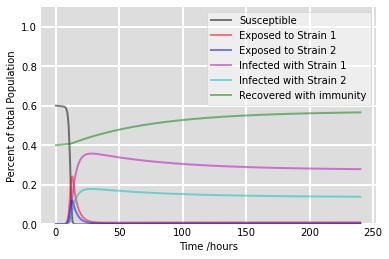

In [32]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 10000000000
newHosts, initialProt = 9000000, 0.4
# Initial number of infected and recovered individuals, I0 and R0.
E10, E20, I10, I20, R0 = 0, 0, 1000, 500, initialProt * N
# Everyone else, S0, is susceptible to infection initially.
S0 = N - E10 - E20 - I10 - I20 - R0
# Kontakt-Raten der zwei Varianten (in Geräten pro Stunde)
cR1, cR2 = 12, 12
# Infektions-Raten TODO: Fest Werte, gecappt beim jeweiligen E
iR1, iR2 = 0.25, 0.25
# Overtake-Raten, wie gut eine Variante im übernehmen einer anderen ist
oR1, oR2 = 0, 0
# Angaben, wie viele User ihre Geräte später schützen, und wie schnell dieser Schutz geknackt wird
laterProt, waning = 0.0083, 0.006
# A grid of time points (in hours)
t = np.linspace(0, 240, 240)

# The SIR model differential equations.
def deriv(y, t, N, contact, recovery, newHosts, initialProt, laterProt, waning):
    S, E1, E2, I1, I2, R = y
    dSdt = newHosts*(1-initialProt) - ((cR1 * S * I1) / N) - ((cR2 * S * I2) / N) + waning*R
    dE1dt = (cR1 * S * I1) / N  - (iR1 + laterProt) * E1 + oR1 * I2
    dE2dt = (cR2 * S * I2) / N - (iR2 + laterProt) * E2 + oR2 * I1
    dI1dt = iR1 * E1 - laterProt * I1 - oR2 * I1
    dI2dt = iR2 * E2 - laterProt * I2 - oR1 * I2
    dRdt = newHosts*initialProt + laterProt * (S + E1 + E2 + I1 + I2) - waning*R
    
    dSdt = newHosts*(1-initialProt) - (cR1 * S * I1 / N) - (cR2 * S * I2 / N) + waning*R
    return dSdt, dE1dt, dE2dt, dI1dt, dI2dt, dRdt

# Initial conditions vector
y0 = S0, E10, E20, I10, I20, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, cR1, cR2, newHosts, initialProt, laterProt, waning))
S, E1, E2, I1, I2, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
N1 = S + E1 + E2 + I1 + I2 + R 
ax.plot(t, S/N1, 'black', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E1/N1, 'r', alpha=0.5, lw=2, label='Exposed to Strain 1')
ax.plot(t, E2/N1, 'b', alpha=0.5, lw=2, label='Exposed to Strain 2')
ax.plot(t, I1/N1, 'm', alpha=0.5, lw=2, label='Infected with Strain 1')
ax.plot(t, I2/N1, 'c', alpha=0.5, lw=2, label='Infected with Strain 2')
ax.plot(t, R/N1, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /hours')
ax.set_ylabel('Percent of total Population')
ax.set_ylim(0,1.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

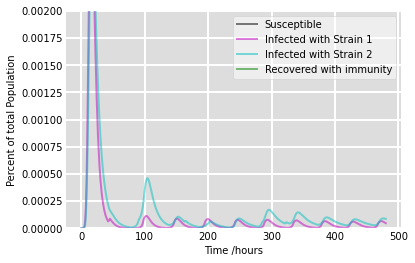

In [48]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 10000000000
newHosts, initialProt = 550000000/24, 0.4
# Initial number of infected and recovered individuals, I0 and R0.
E10, E20, I10, I20, R0 = 0, 0, 1000, 500, initialProt * N
# Everyone else, S0, is susceptible to infection initially.
S0 = N - E10 - E20 - I10 - I20 - R0
# Kontakt-Raten der zwei Varianten (in Geräten pro Stunde)
cR1, cR2 = 12, 12
# Infektions-Raten
iR1, iR2 = 0.25, 0.25
# Overtake-Raten, wie gut eine Variante im übernehmen einer anderen ist
oR1, oR2 = 0, 0
# Angaben, wie viele User ihre Geräte später schützen, und wie schnell dieser Schutz geknackt wird
waning = 0.00417
#Protection-Rates für die Varianten während und außerhalb der BRP
pR1, pR2 = 0.0083, 0.0083
pR1r, pR2r = 0.02, 0.02
# Botnet Attack Threshold und Reduction Time for BAI
AT, BRT = 1000000, 36
notInBRP1 = True
notInBRP2 = True
#
BRP1, BRP2 = 0, 0
# A grid of time points (in hours)
t = np.linspace(0, 480, 480)

# The SIR model differential equations.
def deriv(y, t, N, newHosts, waning):
    S, E1, E2, I1, I2, R = y
    global BRP1
    global BRP2
    global notInBRP1
    global notInBRP2
    
    if I1 > AT and notInBRP1:
        BRP1 = t + BRT
        notInBRP1 = False
    if t < BRP1:
        pR1 = 0.3
    else:
        pR1 = 0.0083
        notInBRP1 = True
        
    if I2 > AT and notInBRP2:
        BRP2 = t + BRT
        notInBRP2 = False
    if t < BRP2:
        pR2 = 0.25
    else:
        pR2 = 0.0083
        notInBRP2 = True
        
    dSdt = newHosts*(1-initialProt) - ((cR1 * S * I1) / N) - ((cR2 * S * I2) / N) + waning*R - pR1 * S
        
    dE1dt = (cR1 * S * I1) / N - iR1 * E1 - pR1 * E1 + oR1 * I2
    dI1dt = iR1 * E1 - pR1 * I1 - oR2 * I1
    
    dE2dt = (cR2 * S * I2) / N - (iR2 + pR2) * E2 + oR2 * I1
    dI2dt = iR2 * E2 - pR2 * I2 - oR1 * I2
    
    dRdt = newHosts*initialProt + pR1 * (E1 + I1) + pR2 * (E2 + I2) - waning*R + pR1 * S
    
    
    return dSdt, dE1dt, dE2dt, dI1dt, dI2dt, dRdt

# Initial conditions vector
y0 = S0, E10, E20, I10, I20, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, newHosts, waning))
S, E1, E2, I1, I2, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
N1 = S + E1 + E2 + I1 + I2 + R 
ax.plot(t, S/N1, 'black', alpha=0.5, lw=2, label='Susceptible')
#ax.plot(t, E1/N1, 'r', alpha=0.5, lw=2, label='Exposed to Strain 1')
#ax.plot(t, E2/N1, 'b', alpha=0.5, lw=2, label='Exposed to Strain 2')
ax.plot(t, I1/N1, 'm', alpha=0.5, lw=2, label='Infected with Strain 1')
ax.plot(t, I2/N1, 'c', alpha=0.5, lw=2, label='Infected with Strain 2')
ax.plot(t, R/N1, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /hours')
ax.set_ylabel('Percent of total Population')
ax.set_ylim(0,0.002)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

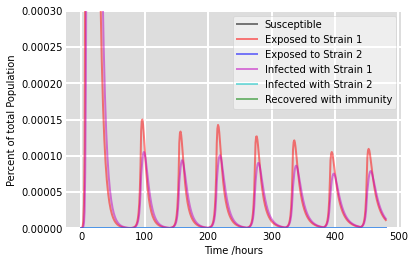

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 10000000000
newHosts, initialProt = 550000000/24, 0.4
# Initial number of infected and recovered individuals, I0 and R0.
E10, E20, I10, I20, R0 = 0, 0, 1000, 500, initialProt * N
# Everyone else, S0, is susceptible to infection initially.
S0 = N - E10 - E20 - I10 - I20 - R0
# Kontakt-Raten der zwei Varianten (in Geräten pro Stunde)
cR1, cR2 = 12, 0
# Infektions-Raten
iR1, iR2 = 0.25, 0.25
# Overtake-Raten, wie gut eine Variante im übernehmen einer anderen ist
oR1, oR2 = 0, 0
# Angaben, wie viele User ihre Geräte später schützen, und wie schnell dieser Schutz geknackt wird
waning = 0.00417
#Protection-Rates für die Varianten während und außerhalb der BRP
pR1, pR2 = 0.0083, 0.0083
pR1r, pR2r = 0.02, 0.02
# Botnet Attack Threshold und Reduction Time for BAI
AT, BRT = 1000000, 36
notInBRP = True
#
BRP = 0
# A grid of time points (in hours)
t = np.linspace(0, 480, 480)

# The SIR model differential equations.
def deriv(y, t, N, newHosts, waning):
    S, E1, E2, I1, I2, R = y
    global BRP
    global notInBRP
    
    if I1 > AT or I2 > AT and notInBRP:
        BRP = t + BRT
        notInBRP = False
        
    if t < BRP:
        pR1 = 0.3
        pR2 = 0.3
    else:
        pR1 = 0.0083
        pR2 = 0.0083
        notInBRP = True
        
    dSdt = newHosts*(1-initialProt) - ((cR1 * S * I1) / N) - ((cR2 * S * I2) / N) + waning*R - pR1 * S
        
    dE1dt = (cR1 * S * I1) / N - iR1 * E1 - pR1 * E1 + oR1 * I2
    dI1dt = iR1 * E1 - pR1 * I1 - oR2 * I1
    
    dE2dt = (cR2 * S * I2) / N - (iR2 + pR2) * E2 + oR2 * I1
    dI2dt = iR2 * E2 - pR2 * I2 - oR1 * I2
    
    dRdt = newHosts*initialProt + pR1 * (E1 + I1) + pR2 * (E2 + I2) - waning*R + pR1 * S
    
    
    return dSdt, dE1dt, dE2dt, dI1dt, dI2dt, dRdt

# Initial conditions vector
y0 = S0, E10, E20, I10, I20, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, newHosts, waning))
S, E1, E2, I1, I2, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
N1 = S + E1 + E2 + I1 + I2 + R 
ax.plot(t, S/N1, 'black', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E1/N1, 'r', alpha=0.5, lw=2, label='Exposed to Strain 1')
ax.plot(t, E2/N1, 'b', alpha=0.5, lw=2, label='Exposed to Strain 2')
ax.plot(t, I1/N1, 'm', alpha=0.5, lw=2, label='Infected with Strain 1')
ax.plot(t, I2/N1, 'c', alpha=0.5, lw=2, label='Infected with Strain 2')
ax.plot(t, R/N1, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /hours')
ax.set_ylabel('Percent of total Population')
ax.set_ylim(0,0.0003)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

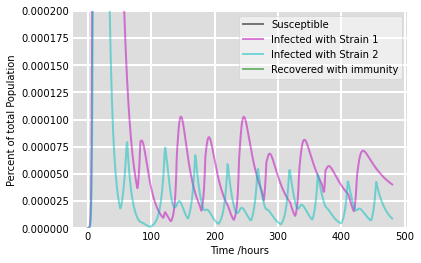

In [66]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 10000000000
newHosts, initialProt = 550000000/24, 0.4
# Initial number of infected and recovered individuals, I0 and R0.
E10, E20, I10, I20, R0 = 0, 0, 1000, 500, initialProt * N
# Everyone else, S0, is susceptible to infection initially.
S0 = N - E10 - E20 - I10 - I20 - R0
# Kontakt-Raten der zwei Varianten (in Geräten pro Stunde)
cR1, cR2 = 12, 12
# Infektions-Raten
iR1, iR2 = 0.25, 0.25
# Overtake-Raten, wie gut eine Variante im übernehmen einer anderen ist
oR1, oR2 = 0, 0
# Angaben, wie viele User ihre Geräte später schützen, und wie schnell dieser Schutz geknackt wird
waning = 0.00417
#Protection-Rates für die Varianten während und außerhalb der BRP
pR1, pR2 = 0.0083, 0.0083
pR1r, pR2r = 0.02, 0.02
# Botnet Attack Threshold und Reduction Time for BAI
AT, BRT = 1000000, 36
notInBRP1 = True
notInBRP2 = True
#
BRP1, BRP2 = 0, 0
# A grid of time points (in hours)
t = np.linspace(0, 480, 480)

# The SIR model differential equations.
def deriv(y, t, N, newHosts, waning):
    S, E1, E2, I1, I2, R = y
    global BRP1
    global BRP2
    global notInBRP1
    global notInBRP2
    
    if I1 > AT and notInBRP1:
        BRP1 = t + BRT
        notInBRP1 = False
    if I2 > AT and notInBRP2:
        BRP2 = t + BRT
        notInBRP2 = False
        
    if t < BRP1:
        pR1 = 0.3
    elif t < BRP2 - 27:
        pR1 = 0.3
        notInBRP1 = True
    else:
        pR1 = 0.0083
        notInBRP1 = True
        
    if t < BRP2:
        pR2 = 0.3
    elif t < BRP1 - 27:
        pR2 = 0.3
        notInBRP2 = True
    else:
        pR2 = 0.0083
        notInBRP2 = True
        
        
    dSdt = newHosts*(1-initialProt) - ((cR1 * S * I1) / N) - ((cR2 * S * I2) / N) + waning*R - pR1 * S
        
    dE1dt = (cR1 * S * I1) / N - iR1 * E1 - pR1 * E1 + oR1 * I2
    dI1dt = iR1 * E1 - pR1 * I1 - oR2 * I1
    
    dE2dt = (cR2 * S * I2) / N - (iR2 + pR2) * E2 + oR2 * I1
    dI2dt = iR2 * E2 - pR2 * I2 - oR1 * I2
    
    dRdt = newHosts*initialProt + pR1 * (E1 + I1) + pR2 * (E2 + I2) - waning*R + pR1 * S
    
    
    return dSdt, dE1dt, dE2dt, dI1dt, dI2dt, dRdt

# Initial conditions vector
y0 = S0, E10, E20, I10, I20, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, newHosts, waning))
S, E1, E2, I1, I2, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
N1 = S + E1 + E2 + I1 + I2 + R 
ax.plot(t, S/N1, 'black', alpha=0.5, lw=2, label='Susceptible')
#ax.plot(t, E1/N1, 'r', alpha=0.5, lw=2, label='Exposed to Strain 1')
#ax.plot(t, E2/N1, 'b', alpha=0.5, lw=2, label='Exposed to Strain 2')
ax.plot(t, I1/N1, 'm', alpha=0.5, lw=2, label='Infected with Strain 1')
ax.plot(t, I2/N1, 'c', alpha=0.5, lw=2, label='Infected with Strain 2')
ax.plot(t, R/N1, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /hours')
ax.set_ylabel('Percent of total Population')
ax.set_ylim(0,0.0002)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

[0.03416062 0.00840516]
[[ 1.93401121e-05 -4.48507433e-07]
 [-4.48507433e-07  1.49433066e-07]]


C:\Users\danie\AppData\Roaming\Python\Python39\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


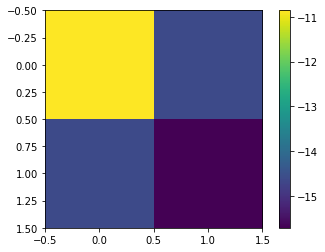

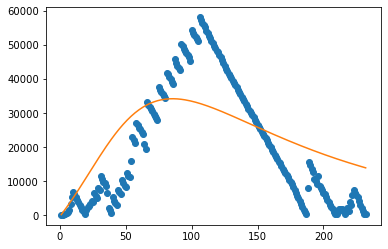

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
import scipy.stats as stats

ydata = ['260', '167', '306', '574', '702', '1005', '1471', '3241', '5477', '6968', '6153', '5496', '4670', '3831', '3195', '2356', '1751', '924', '446', '1560', '2496', '2857', '3358', '4371', '3847', '6549', '5850', '5198', '8086', '7434', '11699', '10783', '9942', '9437', '8715', '6735', '2240', '1527', '664', '5329', '4271', '3707', '3055', '7564', '6968', '6316', '10508', '9483', '8691', '8272', '12371', '11580', '11160', '15888', '23016', '22017', '21362', '27259', '26408', '25787', '25415', '24589', '23831', '20943', '19405', '33329', '32464', '31918', '31129', '30492', '29840', '29188', '28536', '28116', '37619', '36760', '36268', '35616', '34964', '34312', '41901', '41393', '40527', '39902', '39250', '38598', '45767', '44665', '43955', '43303', '42650', '50383', '49638', '48942', '48365', '47681', '47029', '46563', '45259', '54334', '53469', '52945', '52246', '51594', '51035', '58116', '57371', '56532', '55857', '55204', '54001', '53388', '52573', '51920', '51268', '50527', '49768', '48986', '48328', '47837', '47076', '46424', '45544', '44661', '43877', '43023', '42231', '41579', '40927', '40306', '39526', '38893', '38240', '37538', '36789', '36129', '35477', '34809', '34172', '33520', '32607', '31998', '31331', '30694', '30067', '29405', '28756', '27977', '27325', '26672', '26020', '25368', '24609', '23986', '23334', '22692', '22030', '21269', '20617', '19964', '19312', '18660', '17868', '17111', '16471', '15819', '15353', '14470', '13769', '13117', '12465', '11812', '11160', '10508', '9840', '9204', '8482', '7573', '6723', '5831', '5221', '4293', '3365', '2599', '1700', '1145', '353', '8000', '15606', '14794', '13652', '12837', '10788', '10135', '9344', '11440', '8785', '8132', '7480', '6572', '6222', '5400', '4545', '3893', '3138', '2496', '1859', '1052', '469', '477', '1217', '1805', '2046', '1769', '1192', '446', '928', '2161', '1409', '3847', '3055', '5955', '7356', '6614', '6140', '5349', '4254', '3160', '2193', '1269', '516', '481']
xdata = np.linspace(1, 232, 232)

ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

#cR = Contact-Rate
#pR = Protection-Rate

def sir_model(y, x, cR, pR):
    S = -cR * y[0] * y[1] / N - pR * y[0]
    R = pR * y[0] + pR * y[1]
    I = +cR * y[0] * y[1] / N + pR * y[0] - pR * y[1]
    return S, I, R

def fit_odeint(x, cR, pR):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(cR, pR))[:,1]

N = 60000
I0 = ydata[0]
S0 = N - I0
R0 = 0.0

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata, p0=np.asarray([2.0,0.5]))
fitted = fit_odeint(xdata, *popt)
print(popt)
print(pcov)

plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)

C:\Users\danie\AppData\Roaming\Python\Python39\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[0.45253743 0.1871574  2.55636352 1.0936334 ]
[[ 2.43544854e-03  4.58537731e-04 -9.88437032e-03 -6.57029055e-03]
 [ 4.58537731e-04  1.18133621e-04 -1.85789491e-03 -8.99817284e-04]
 [-9.88437032e-03 -1.85789491e-03  2.18840955e-01 -1.47286617e-02]
 [-6.57029055e-03 -8.99817284e-04 -1.47286617e-02  4.63234653e-02]]


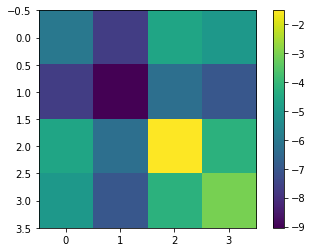

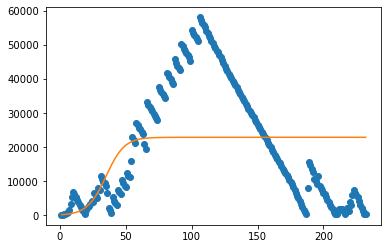

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
import scipy.stats as stats

ydata = ['260', '167', '306', '574', '702', '1005', '1471', '3241', '5477', '6968', '6153', '5496', '4670', '3831', '3195', '2356', '1751', '924', '446', '1560', '2496', '2857', '3358', '4371', '3847', '6549', '5850', '5198', '8086', '7434', '11699', '10783', '9942', '9437', '8715', '6735', '2240', '1527', '664', '5329', '4271', '3707', '3055', '7564', '6968', '6316', '10508', '9483', '8691', '8272', '12371', '11580', '11160', '15888', '23016', '22017', '21362', '27259', '26408', '25787', '25415', '24589', '23831', '20943', '19405', '33329', '32464', '31918', '31129', '30492', '29840', '29188', '28536', '28116', '37619', '36760', '36268', '35616', '34964', '34312', '41901', '41393', '40527', '39902', '39250', '38598', '45767', '44665', '43955', '43303', '42650', '50383', '49638', '48942', '48365', '47681', '47029', '46563', '45259', '54334', '53469', '52945', '52246', '51594', '51035', '58116', '57371', '56532', '55857', '55204', '54001', '53388', '52573', '51920', '51268', '50527', '49768', '48986', '48328', '47837', '47076', '46424', '45544', '44661', '43877', '43023', '42231', '41579', '40927', '40306', '39526', '38893', '38240', '37538', '36789', '36129', '35477', '34809', '34172', '33520', '32607', '31998', '31331', '30694', '30067', '29405', '28756', '27977', '27325', '26672', '26020', '25368', '24609', '23986', '23334', '22692', '22030', '21269', '20617', '19964', '19312', '18660', '17868', '17111', '16471', '15819', '15353', '14470', '13769', '13117', '12465', '11812', '11160', '10508', '9840', '9204', '8482', '7573', '6723', '5831', '5221', '4293', '3365', '2599', '1700', '1145', '353', '8000', '15606', '14794', '13652', '12837', '10788', '10135', '9344', '11440', '8785', '8132', '7480', '6572', '6222', '5400', '4545', '3893', '3138', '2496', '1859', '1052', '469', '477', '1217', '1805', '2046', '1769', '1192', '446', '928', '2161', '1409', '3847', '3055', '5955', '7356', '6614', '6140', '5349', '4254', '3160', '2193', '1269', '516', '481']
xdata = np.linspace(1, 232, 232)

ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

#cR = Contact-Rate
#pR = Protection-Rate
#wR = Waning-Rate
#iR = Infection-Rate

#y[0] = S
#y[1] = I
#y[2] = R
#y[3] = E

def seirs_model(y, x, cR, pR, wR, iR):
    S = -cR * y[0] * y[1] / N - pR * y[0] + wR * y[2]
    E = +cR * y[0] * y[1] / N - pR * y[3] - iR * y[3]
    I = +iR * y[3] - pR * y[1]
    R = +pR * y[0] + pR * y[1] + pR * y[3] - wR * y[2]
    return S, E, I, R

def fit_odeint(x, cR, pR, wR, iR):
    return integrate.odeint(seirs_model, (S0, I0, R0, E0), x, args=(cR, pR, wR, iR))[:,1]

N = 60000
I0 = ydata[0]
R0 = 0.4 * N
S0 = N - I0 - R0
E0 = 0

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata, p0=np.asarray([2.0,0.5,1.0, 1.0]))
fitted = fit_odeint(xdata, *popt)
print(popt)
print(pcov)

plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)